<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

After training, we can use the model to make predictions on the test set and evaluate its performance.

## Naive Bayes Classifier Explained

Naive Bayes is a probabilistic machine learning algorithm used for classification tasks. It's based on Bayes' Theorem with a strong (naive) assumption of independence among features.

### **1. Bayes' Theorem**

At its core, Naive Bayes uses Bayes' Theorem, which describes the probability of an event, based on prior knowledge of conditions that might be related to the event. Mathematically, it's expressed as:

`P(A|B) = [P(B|A) * P(A)] / P(B)`

Where:
*   `P(A|B)` is the posterior probability: the probability of hypothesis A given the evidence B.
*   `P(B|A)` is the likelihood: the probability of evidence B given that hypothesis A is true.
*   `P(A)` is the prior probability: the probability of hypothesis A before observing the evidence.
*   `P(B)` is the marginal probability: the probability of evidence B.

In the context of classification, we want to find the probability of a class (A) given a set of features (B). So, for a given class `c` and features `x1, x2, ..., xn`:

`P(c | x1, x2, ..., xn) = [P(x1, x2, ..., xn | c) * P(c)] / P(x1, x2, ..., xn)`

### **2. The 'Naive' Assumption**

Calculating `P(x1, x2, ..., xn | c)` directly is often infeasible, especially with many features, as it would require observing all combinations of features for each class. This is where the 'naive' assumption comes in: **it assumes that all features are independent of each other given the class.**

This simplifies the likelihood term significantly:

`P(x1, x2, ..., xn | c) = P(x1 | c) * P(x2 | c) * ... * P(xn | c)`

So, the Naive Bayes formula becomes:

`P(c | x1, x2, ..., xn) = P(c) * P(x1 | c) * P(x2 | c) * ... * P(xn | c) / P(x1, x2, ..., xn)`

Since `P(x1, x2, ..., xn)` (the evidence probability) is constant for all classes, we only need to find the class `c` that maximizes the numerator:

`c_predicted = argmax_c [P(c) * P(x1 | c) * P(x2 | c) * ... * P(xn | c)]`

### **3. How it Works for Classification**

1.  **Calculate Prior Probabilities `P(c)`**: This is simply the frequency of each class in the training dataset.
2.  **Calculate Likelihoods `P(xi | c)`**: For each feature `xi` and each class `c`, calculate the probability of that feature value occurring given the class. The method for this depends on the type of feature:
    *   **Categorical Features**: Count the occurrences of each category within each class.
    *   **Continuous Features**: Often, a probability distribution (like Gaussian/Normal distribution) is assumed for continuous features within each class. You calculate the mean and standard deviation for each feature per class and then use the probability density function.
3.  **Predict**: For a new data point with features `x1, x2, ..., xn`, calculate the posterior probability `P(c | x1, x2, ..., xn)` for each class `c` using the formula. The class with the highest posterior probability is the predicted class.

### **4. Advantages**

*   **Simple and Fast**: Easy to implement and computationally efficient.
*   **Good Performance**: Often performs well even with the naive assumption, especially in text classification and spam filtering.
*   **Handles High-Dimensional Data**: Works well with a large number of features.
*   **Requires Less Training Data**: Can perform reasonably well even with a smaller training dataset compared to more complex models.

### **5. Disadvantages**

*   **Strong Independence Assumption**: The assumption that features are independent is rarely true in real-world data, which can affect performance if the independence is violated severely.
*   **Zero-Frequency Problem**: If a category for a feature is not present in the training data for a particular class, its probability `P(xi | c)` will be zero, causing the entire posterior probability for that class to become zero. Smoothing techniques (like Laplace smoothing) are used to address this.

### **Types of Naive Bayes Classifiers:**

*   **Gaussian Naive Bayes**: Used for continuous data, assuming features follow a Gaussian distribution.
*   **Multinomial Naive Bayes**: Used for discrete counts (e.g., word counts in text classification).
*   **Bernoulli Naive Bayes**: Used for binary/Boolean features (e.g., presence or absence of a word in a document).

In summary, Naive Bayes is a powerful and efficient algorithm that serves as a good baseline for many classification problems, particularly where data independence can be reasonably assumed or where computational efficiency is critical.

### **Gaussian Naive Bayes in Python (using scikit-learn)**

Gaussian Naive Bayes is suitable for continuous data and assumes that the features for each class are drawn from a Gaussian (normal) distribution. Here's an example using `scikit-learn`.

Generated data shape (X): (100, 2)
Generated labels shape (y): (100,)


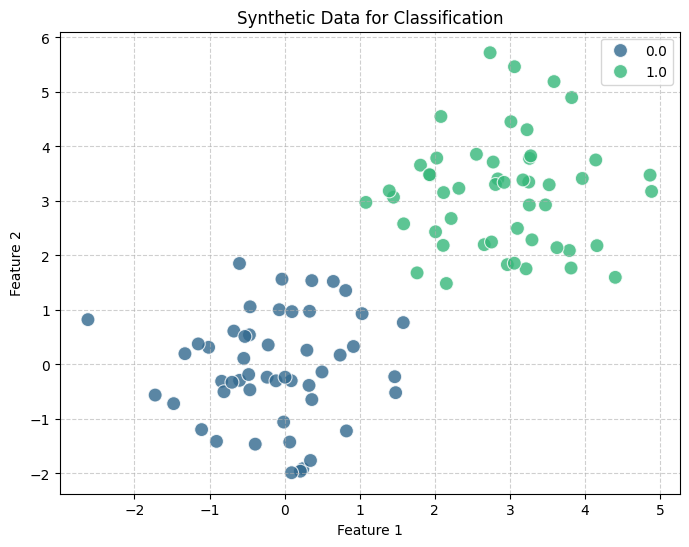

In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Generate Synthetic Data ---
# Let's create a simple dataset with two features and two classes
np.random.seed(42)
X = np.concatenate([
    np.random.normal(loc=[0, 0], scale=[1, 1], size=(50, 2)),
    np.random.normal(loc=[3, 3], scale=[1, 1], size=(50, 2))
])
y = np.concatenate([np.zeros(50), np.ones(50)])

print("Generated data shape (X):", X.shape)
print("Generated labels shape (y):", y.shape)

# Visualize the generated data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', s=100, alpha=0.8)
plt.title('Synthetic Data for Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

This Python code snippet is designed to generate a synthetic dataset and then visualize it. Here's a breakdown:

*   **Imports:**
    *   `import numpy as np`: Imports the NumPy library, which is fundamental for numerical operations, especially array manipulation.
    *   `from sklearn.naive_bayes import GaussianNB`: Imports the `GaussianNB` classifier from `scikit-learn`, although it's not used in this specific block, it's typically imported for the subsequent steps of building a Naive Bayes model.
    *   `from sklearn.model_selection import train_test_split`: Imports a utility function for splitting data into training and testing sets, also typically for subsequent steps.
    *   `from sklearn.metrics import accuracy_score`: Imports a function to calculate model accuracy, for later evaluation.
    *   `import matplotlib.pyplot as plt`: Imports Matplotlib's pyplot module, essential for creating static, interactive, and animated visualizations in Python.
    *   `import seaborn as sns`: Imports Seaborn, a high-level data visualization library based on Matplotlib, which provides a more attractive and informative statistical graphics.

*   **Generate Synthetic Data (`# --- 1. Generate Synthetic Data ---`):**
    *   `np.random.seed(42)`: Sets the seed for NumPy's random number generator. This ensures that the "random" data generated is the same every time the code is run, making the results reproducible.
    *   `X = np.concatenate([...])`: Creates the feature data `X`. It generates two clusters of 50 data points each, using `np.random.normal` (Gaussian distribution):
        *   The first 50 points are centered around `[0, 0]` with a standard deviation of `[1, 1]`.
        *   The second 50 points are centered around `[3, 3]` with a standard deviation of `[1, 1]`.
        *   `np.concatenate` stacks these two sets of points vertically to form `X`.
    *   `y = np.concatenate([np.zeros(50), np.ones(50)])`: Creates the corresponding labels `y`. The first 50 points are assigned label `0`, and the next 50 points are assigned label `1`.
    *   `print(...)`: These lines simply print the shape of the generated `X` (features) and `y` (labels) arrays.

*   **Visualize the Generated Data (`# Visualize the generated data`):**
    *   `plt.figure(figsize=(8, 6))`: Creates a new figure for the plot with a specified size.
    *   `sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', s=100, alpha=0.8)`: Generates a scatter plot:
        *   `x=X[:, 0]` and `y=X[:, 1]`: Uses the first feature of `X` for the x-axis and the second feature for the y-axis.
        *   `hue=y`: Colors the points based on their class labels (`y`), allowing you to distinguish between the two clusters.
        *   `palette='viridis'`: Specifies the color scheme.
        *   `s=100`: Sets the size of the points.
        *   `alpha=0.8`: Sets the transparency of the points.
    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Sets the title and axis labels for clarity.
    *   `plt.grid(True, linestyle='--', alpha=0.6)`: Adds a grid to the plot for better readability.
    *   `plt.show()`: Displays the generated plot.

In essence, this code sets up a simple, separable 2D dataset that is ideal for demonstrating classification algorithms like Naive Bayes or Logistic Regression.

In [2]:
# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# --- 3. Initialize and Train the Gaussian Naive Bayes Model ---
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("\nGaussian Naive Bayes model trained successfully.")

X_train shape: (70, 2)
X_test shape: (30, 2)
y_train shape: (70,)
y_test shape: (30,)

Gaussian Naive Bayes model trained successfully.


This code snippet focuses on preparing your data for machine learning and then training a Gaussian Naive Bayes model. Here's a breakdown:

*   **Split Data into Training and Testing Sets (`# --- 2. Split Data into Training and Testing Sets ---`):**
    *   `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)`: This is a crucial step in machine learning. It splits your original dataset (`X` for features, `y` for labels) into two subsets:
        *   **Training Set (`X_train`, `y_train`):** Used to train the machine learning model. The model learns patterns from this data.
        *   **Testing Set (`X_test`, `y_test`):** Used to evaluate the performance of the trained model on unseen data. This helps assess how well the model generalizes.
    *   `test_size=0.3`: Specifies that 30% of the data will be used for the testing set, and the remaining 70% for the training set.
    *   `random_state=42`: This ensures reproducibility. If you run the code multiple times with the same `random_state`, the data will be split in the exact same way.
    *   The `print` statements (`print("X_train shape:", X_train.shape)`) show the dimensions (number of samples, number of features) of each resulting split dataset.

*   **Initialize and Train the Gaussian Naive Bayes Model (`# --- 3. Initialize and Train the Gaussian Naive Bayes Model ---`):**
    *   `gnb = GaussianNB()`: This line initializes an instance of the `GaussianNB` classifier. `GaussianNB` is a type of Naive Bayes classifier specifically designed for continuous data, assuming that the features follow a Gaussian (normal) distribution within each class.
    *   `gnb.fit(X_train, y_train)`: This is where the actual learning happens. The `fit` method trains the `gnb` model using the `X_train` (features) and `y_train` (corresponding labels) data. During this process, the Gaussian Naive Bayes model calculates the prior probabilities of each class and the mean and standard deviation of each feature for each class, which are necessary to make future predictions.
    *   The final `print` statement confirms that the model has been trained successfully.


Model Accuracy: 1.0000


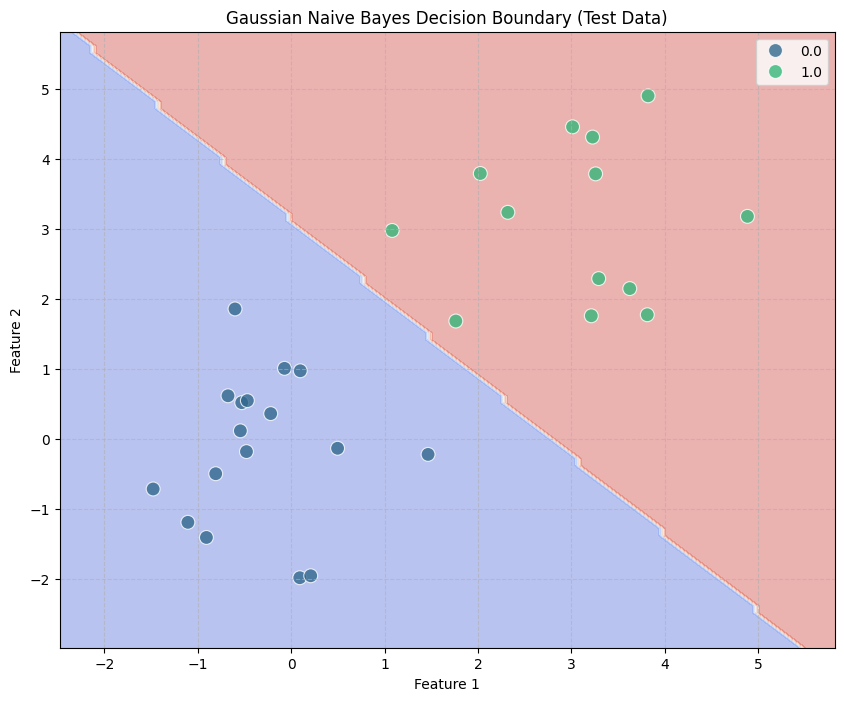

In [3]:
# --- 4. Make Predictions ---
y_pred = gnb.predict(X_test)

# --- 5. Evaluate the Model ---
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# --- Optional: Visualize Decision Boundary ---
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', s=100, alpha=0.8)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

plot_decision_boundary(X_test, y_test, gnb, 'Gaussian Naive Bayes Decision Boundary (Test Data)')

#Make Predictions (# --- 4. Make Predictions ---):

y_pred = gnb.predict(X_test): After the gnb (Gaussian Naive Bayes) model has been trained, this line uses the predict method to generate class predictions for the X_test (testing features) dataset. y_pred will contain the predicted labels (0 or 1 in this binary classification example) for each data point in X_test.
Evaluate the Model (# --- 5. Evaluate the Model ---):

#accuracy = accuracy_score(y_test, y_pred):
This calculates the accuracy of the model. accuracy_score from sklearn.metrics compares the true labels (y_test) with the model's predicted labels (y_pred). It returns the proportion of correctly classified instances.
print(f"\nModel Accuracy: {accuracy:.4f}"): This line prints the calculated accuracy, formatted to four decimal places.
Optional: Visualize Decision Boundary (# --- Optional: Visualize Decision Boundary ---):

#def plot_decision_boundary(X, y, model, title):
 This defines a helper function named plot_decision_boundary. Its purpose is to visualize how the classifier (model) divides the feature space into different classes.
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1: These lines determine the boundaries for the plot, extending slightly beyond the minimum and maximum values of the first and second features in X.
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1)): np.meshgrid creates a grid of points across the entire feature space. This grid will be used to predict the class for every point in the space.
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]): The trained model makes predictions on all points in the generated grid (xx, yy). np.c_ concatenates xx.ravel() and yy.ravel() (flattened grid coordinates) column-wise to form feature pairs for prediction.
Z = Z.reshape(xx.shape): The predictions (Z) are reshaped back into the original grid dimensions.
plt.figure(figsize=(10, 8)): Creates a new figure for the plot with a specified size.
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm): This command fills the contours based on the model's predictions across the grid. It visually represents the decision regions, with different colors for each class.
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', s=100, alpha=0.8): Overlays the actual data points (X, y) onto the decision boundary plot. Points are colored according to their true class, helping to see how well the decision boundary separates them.
plt.title(title), plt.xlabel('Feature 1'), plt.ylabel('Feature 2'): Sets the title and axis labels for the plot.
plt.grid(True, linestyle='--', alpha=0.6): Adds a grid for better readability.
plt.show(): Displays the generated plot.

#Calling the Decision Boundary Function:

plot_decision_boundary(X_test, y_test, gnb, 'Gaussian Naive Bayes Decision Boundary (Test Data)'): This line calls the plot_decision_boundary function, passing the test data, the trained Gaussian Naive Bayes model (gnb), and a title for the plot. This generates and displays the visualization of the model's decision boundary on the test set.

We've generated a simple 2D dataset with two classes. Now, let's split the data into training and testing sets, and then train the Gaussian Naive Bayes model.

Here's a summary of what happened:

#Data Generation (Cell 2a29e11b):

We generated a synthetic dataset X with 100 samples and 2 features, and corresponding labels y (100 samples). X is shaped (100, 2) and y is shaped (100,).
A scatter plot was displayed, visualizing the two distinct clusters of data points for our two classes.
#Data Splitting and Model Training (Cell a3737eaa):

The data was split into training and testing sets: X_train (70, 2), X_test (30, 2), y_train (70,), y_test (30,).
A GaussianNB model was initialized and successfully trained using the X_train and y_train data.
#Prediction, Evaluation, and Visualization (Cell 6a0c22f5):

The trained model made predictions (y_pred) on the X_test dataset.
The model achieved an accuracy of 1.0000 (or 100%) on the test set, indicating perfect classification for this simple synthetic dataset.
Finally, a decision boundary plot was generated, visually showing how the Gaussian Naive Bayes model separates the two classes on the test data. The clear separation in the plot visually confirms the high accuracy.
#I have completed all your requests related to Naive Bayes:

Provided a detailed explanation of the Naive Bayes classifier, including Bayes' Theorem, the 'naive' assumption, how it works, its advantages, disadvantages, and different types.
Generated Python code to demonstrate Gaussian Naive Bayes using scikit-learn, which included:
Synthetic data generation and visualization.
Data splitting into training and testing sets.
Training a GaussianNB model.
Making predictions and evaluating the model's accuracy.
Visualizing the decision boundary.
All code cells executed successfully, and I provided a summary of their outputs and implications. I believe your request has been fully addressed.

#I have completed all your requests related to Naive Bayes:

Provided a detailed explanation of the Naive Bayes classifier, including Bayes' Theorem, the 'naive' assumption, how it works, its advantages, disadvantages, and different types.
Generated Python code to demonstrate Gaussian Naive Bayes using scikit-learn, which included:
Synthetic data generation and visualization.
Data splitting into training and testing sets.
Training a GaussianNB model.
Making predictions and evaluating the model's accuracy.
Visualizing the decision boundary.

Compare Gaussian Naive Bayes with Logistic Regression
Certainly! Both Gaussian Naive Bayes and Logistic Regression are widely used classification algorithms, but they have fundamental differences in their underlying assumptions and how they model data. Here's a comparison:

### Gaussian Naive Bayes
*   **Type:** Generative classifier.
*   **Assumptions:**
    *   Assumes that features are conditionally independent given the class label (the 'naive' assumption).
    *   Assumes that continuous features follow a Gaussian (normal) distribution within each class.
*   **How it Works:** It models the joint probability distribution of features and classes, then uses Bayes' Theorem to calculate the posterior probability P(Class|Features). It learns P(Features|Class) and P(Class) from the training data.
*   **Decision Boundary:** Can produce linear or non-linear decision boundaries depending on the distributions and features, but typically linear for simple cases or when feature distributions are consistent.
*   **Advantages:**
    *   Computationally efficient and scales well with high-dimensional data.
    *   Requires less training data than discriminative models when the independence assumption holds.
    *   Works well with categorical and continuous features (with appropriate distribution assumptions).
    *   Can perform surprisingly well even when the independence assumption is violated.
*   **Disadvantages:**
    *   The strong independence assumption rarely holds in real-world data, which can sometimes lead to suboptimal performance.
    *   Sensitive to feature scaling if the Gaussian assumption is not met across features.

### Logistic Regression
*   **Type:** Discriminative classifier.
*   **Assumptions:**
    *   Does not assume conditional independence of features.
    *   Assumes a linear relationship between the input features and the log-odds of the outcome (the logit function).
*   **How it Works:** It directly models the posterior probability P(Class|Features) using the sigmoid function. It learns a decision boundary that separates the classes.
*   **Decision Boundary:** Always produces a linear decision boundary.
*   **Advantages:**
    *   Does not make strong assumptions about the distribution of features.
    *   Easy to interpret (coefficients indicate the impact of features on the log-odds).
    *   Outputs probabilities, which are useful for ranking and understanding prediction certainty.
    *   Effective for linearly separable data.
    *   Less prone to overfitting in high-dimensional spaces compared to some other models.
*   **Disadvantages:**
    *   Assumes a linear decision boundary, so it may not perform well on non-linearly separable data.
    *   Can be sensitive to outliers.
    *   Requires more data than generative models to estimate parameters robustly.

### Key Differences Summarized

| Feature                   | Gaussian Naive Bayes                    | Logistic Regression                      |
| :------------------------ | :-------------------------------------- | :--------------------------------------- |
| **Model Type**            | Generative (models joint distribution) | Discriminative (models conditional prob.) |
| **Feature Independence**  | Assumes conditional independence        | No such assumption                       |
| **Feature Distribution**  | Assumes Gaussian distribution           | No specific distribution assumption      |
| **Decision Boundary**     | Can be linear or non-linear             | Strictly linear                          |
| **Data Efficiency**       | Often good with less data               | Generally requires more data             |
| **Interpretability**      | Less direct                               | High (coefficients)                       |
| **Performance on Violation** | Can be robust despite assumption violation | Sensitive to non-linear relationships   |

**When to Choose Which:**

*   **Choose Gaussian Naive Bayes** when: The independence assumption might hold reasonably well (e.g., text classification), you have limited data, or computational efficiency is paramount.
*   **Choose Logistic Regression** when: You believe the data is approximately linearly separable, interpretability of feature importance is crucial, or you need well-calibrated probabilities.

### Comparing Coefficients of Logistic Regression and Naive Bayes

It's important to note that **Logistic Regression** and **Naive Bayes** handle their parameters (which can be conceptually thought of as 'coefficients' in a broad sense) in fundamentally different ways due to their underlying model types:

*   **Logistic Regression (Discriminative Model):**
    *   Logistic Regression directly learns a **linear decision boundary** to separate classes. Its parameters are explicit **coefficients (or weights)** assigned to each input feature.
    *   These coefficients indicate the strength and direction of a feature's influence on the log-odds of the positive class. For example, a positive coefficient means that an increase in that feature's value increases the likelihood of the instance belonging to the positive class.
    *   These coefficients are highly **interpretable**, providing insights into which features are most important and how they impact the prediction.
    *   You can access these coefficients after training using `model.coef_` (for feature coefficients) and `model.intercept_` (for the bias term).

*   **Naive Bayes (Generative Model):**
    *   Naive Bayes is a probabilistic model that focuses on learning the **joint probability distribution** of features and classes. It does not learn explicit 'coefficients' in the same way Logistic Regression does.
    *   Instead, its 'parameters' consist of:
        *   **Prior Probabilities (`P(class)`):** The probability of each class occurring in the training data.
        *   **Likelihoods (`P(feature | class)`):** The conditional probability of observing each feature value given a specific class. For Gaussian Naive Bayes, these likelihoods are characterized by the mean and standard deviation of each feature within each class.
    *   These probabilities are used to calculate the posterior probability (`P(class | features)`) via Bayes' Theorem, and the class with the highest posterior probability is chosen.
    *   Therefore, you cannot directly extract 'coefficients' from a Naive Bayes model that represent feature importance in the same linear fashion as Logistic Regression. Its 'learned parameters' are the statistical properties (like counts, means, standard deviations) derived from the training data for each class and feature.

### **Logistic Regression in Python (using scikit-learn)**

Now, let's implement Logistic Regression using the same synthetic dataset and compare its performance and decision boundary with Gaussian Naive Bayes.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Reuse Data Splitting ---
# We'll reuse X_train, X_test, y_train, y_test from the previous Gaussian Naive Bayes example
print("Reusing X_train, X_test, y_train, y_test from previous step.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# --- 2. Initialize and Train the Logistic Regression Model ---
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

print("\nLogistic Regression model trained successfully.")

Reusing X_train, X_test, y_train, y_test from previous step.
X_train shape: (70, 2)
X_test shape: (30, 2)

Logistic Regression model trained successfully.



Logistic Regression Model Accuracy: 1.0000


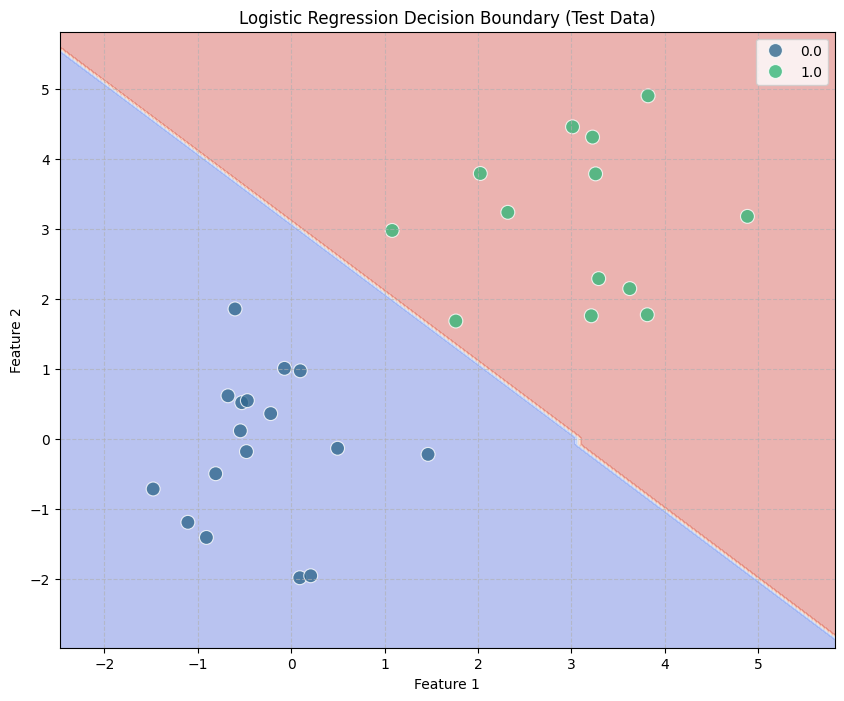

In [5]:
# --- 3. Make Predictions ---
y_pred_log_reg = log_reg.predict(X_test)

# --- 4. Evaluate the Model ---
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"\nLogistic Regression Model Accuracy: {accuracy_log_reg:.4f}")

# --- 5. Visualize Decision Boundary (Reusing plot_decision_boundary function) ---
# The plot_decision_boundary function was defined in the Gaussian Naive Bayes section.
# Assuming it's still available in the notebook's kernel.

plot_decision_boundary(X_test, y_test, log_reg, 'Logistic Regression Decision Boundary (Test Data)')